# KEN1435 - Principles of Data Science | Lab 3: The Normal Approximation for Data

First we load the necessary python packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # you can use this to customize your figures for exercises 9, 10 and 14
import matplotlib.ticker as mticker
import numpy as np
import pandas as pd
import seaborn as sns

from palmerpenguins import load_penguins

%matplotlib inline

Let's start off with a normal approximation for the bill length of the Palmer penguins. Recall that we already displayed the mean absolute deviation of this quantity in exercise 7 of the previous lab. First, we load the data.

In [2]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


1. Calculate the average and standard deviations of the bill length for each species

In [3]:
## YOUR CODE HERE
grouped_penguins = penguins.groupby("species")["bill_length_mm"]
bill_length_standard_deviation = grouped_penguins.std()
bill_length_average = grouped_penguins.mean()
bill_length_average, bill_length_standard_deviation, grouped_penguins.head()

(species
 Adelie       38.791391
 Chinstrap    48.833824
 Gentoo       47.504878
 Name: bill_length_mm, dtype: float64,
 species
 Adelie       2.663405
 Chinstrap    3.339256
 Gentoo       3.081857
 Name: bill_length_mm, dtype: float64,
 0      39.1
 1      39.5
 2      40.3
 3       NaN
 4      36.7
 152    46.1
 153    50.0
 154    48.7
 155    50.0
 156    47.6
 276    46.5
 277    50.0
 278    51.3
 279    45.4
 280    52.7
 Name: bill_length_mm, dtype: float64)

2. Calculate the standardized bill lengths for all penguins, taking into account which species they belong to. Save your result in a column named `bill_sd` in the `penguins` data frame.

In [4]:
## YOUR CODE HERE
mean_bill_length = grouped_penguins.transform("mean")
std_bill_length = grouped_penguins.transform("std")
penguins["bill_sd"] =( penguins["bill_length_mm"] - mean_bill_length ) / std_bill_length

penguins.head() 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_sd
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,0.115870
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0.266054
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0.566421
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,-0.785232


3. Plot histograms of the column `bill_sd`, such that each species is displayed in its own panel. Also calculate which fraction of the penguins fall within two standard deviations from the mean. Based on the output, could you use a normal approximation for the bill length?

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


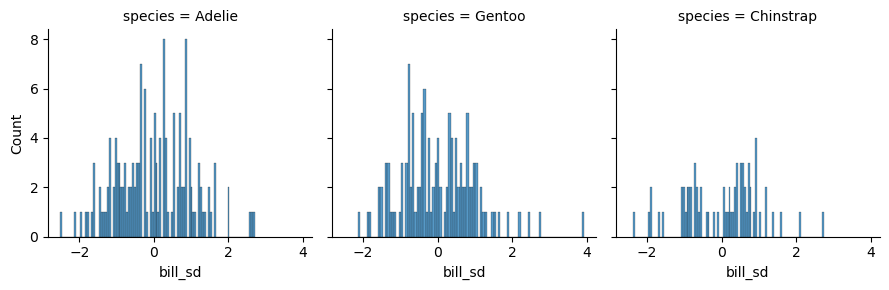

In [5]:
## YOUR CODE HERE
import seaborn as sns

# Create a FacetGrid object
g = sns.FacetGrid(penguins, col="species")

# Apply the histplot function to each subplot
g.map(sns.histplot, "bill_sd", kde=False, bins=100)

# Show the plot
plt.show()

As you can see, the histograms of the bill lengths are not normal.

***Answer:*** *YOUR ANSWER HERE*

## COVID-19: sentiment in Maastricht
Let us now consider another data set that is extracted from social media. It covers a collection of users on social media that were retrieved based on posts that referenced a list of keywords related to the COVID-19 pandemic. Among all messages acquired with these keywords, those users were extacted that indicated their location was a city in the Netherlands. Specifically, we take a look at the accounts that specified "Maastricht" as their location.

First, we load a data frame with general information with regards to the accounts. As the file uses tab as a seperator, we specify this in while loading the file by `sep="\t"`. As the index of the file is contained in the first row of the file, we include `index_col=0`.

In [6]:
uinfo = pd.read_csv("users_maastricht.tsv", sep="\t", index_col=0)
uinfo.head()

,followers,friends
user_id,,
043u0001,733,894
043u0002,3882,539
043u0003,92,647
043u0004,87,122
043u0005,3271,3021


Let's plot the distributions of this data.

4. Visualize friends and followers distributions and plot the corresponding histograms.

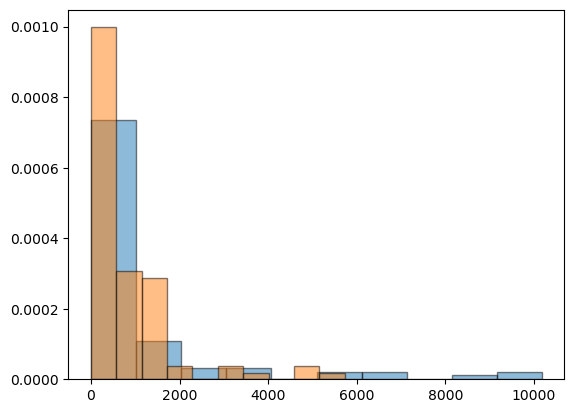

In [44]:
## YOUR CODE HERE
plt.hist(uinfo["followers"], bins = 10, edgecolor = "black", alpha = 0.5, density=True, label = "followers")
plt.hist(uinfo["friends"], bins = 10, edgecolor = "black", alpha = 0.5, density=True, label="friends")
plt.show()


As you can see from the figures, this is far from a normal distribution. Lets first look at the minimum and maximum observations for the friends and followers.

5. Determine the minimum and the maximum counts for both the friend and follower distributions.

In [8]:
## YOUR CODE HERE
min_friends = uinfo["friends"].idxmin()
max_friends = uinfo["friends"].idxmax()
min_followers = uinfo["followers"].idxmin()
max_followers = uinfo["followers"].idxmax()
min_friends_value = uinfo["friends"].min()
max_friends_value = uinfo["friends"].max()
min_followers_value = uinfo["followers"].min()
max_followers_value = uinfo["followers"].max()

As you can see, the values span multiple orders of magnitude, with only a few very large observations. This is a clear indication of a heavy tail distribution. However, there is another way that we can try to perform a normal approximation for this data.

In this alternative, we first calculate the logarithm of all observations (with `np.log10`, see documentation [here](https://numpy.org/doc/stable/reference/generated/numpy.log10.html)) and use those values for a normalization.

6. Plot the normal approximation of the logarithm of the friend and follower data.

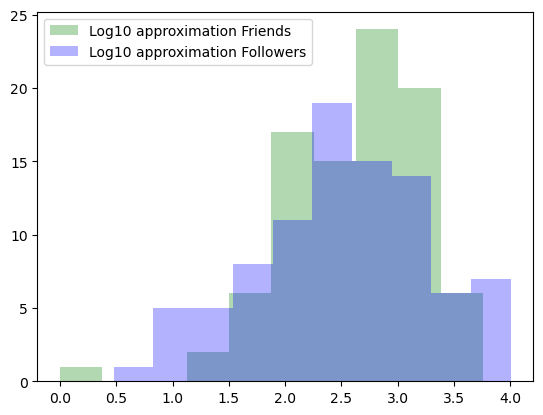

In [18]:
## YOUR CODE HERE
normal_approx_friends = np.log10(uinfo["friends"])
normal_approx_followers = np.log10(uinfo["followers"])

plt.hist(normal_approx_friends, bins = 10, alpha = 0.3, color = "g", label= "Log10 approximation Friends")
plt.hist(normal_approx_followers, bins = 10, alpha = 0.3, color = "b", label= "Log10 approximation Followers")
plt.legend()
plt.show()

7. Which fraction of the logarithmic scale observations are within two standard deviations from the mean?

In [10]:
## YOUR CODE HERE
mean_followers = np.mean(normal_approx_followers)
std_followers = np.std(normal_approx_followers)

lower_bound_followers = mean_followers - 2 * std_followers
upper_bound_followers = mean_followers + 2 * std_followers

outliers_followers = [x for x in normal_approx_followers if x < lower_bound_followers or x > upper_bound_followers]

mean_friends = np.mean(normal_approx_friends)
std_friends = np.std(normal_approx_friends)

lower_bound_friends = mean_friends - 2 * std_friends
upper_bound_friends = mean_friends + 2 * std_friends

outliers_friends = [x for x in normal_approx_friends if x < lower_bound_friends or x > upper_bound_friends]

total_follwers = len(normal_approx_followers)
total_friends = len(normal_approx_friends)

num_within_stdev_friends = total_friends - len(outliers_friends)
num_within_stdev_followers = total_follwers - len(outliers_followers)

fraction_within_stdev_followers = num_within_stdev_followers / total_follwers
fraction_within_stdev_friends = num_within_stdev_friends / total_friends

fraction_within_stdev_friends, fraction_within_stdev_followers

(0.967032967032967, 0.945054945054945)

The fact that calculating the logarithm of the data made our observations fall within a good normal approximation, tells us that the data can be approximated using a log-normal distribution.

Next, we move on to the messages placed by the users. For this, we load the next data file `tweets_maastricht.tsv`. In this file, we have information about which user posted the tweet and at which time, in addition to the sentiment scores for the valence, arousal and dominance dimensions. We set the column `tweet_id` as the index. Moreover, the file is again tab-separated, so we use `sep="\t"`. Finally, to process the dates at which the tweets are posted, we also specify a function that converts them to the correct timestamps, namely `pd.to_datetime`. Note that loading this dataframe might take some time as a result of this conversion to datetime objects. Therefore, we include the `%%time` command, which allows us to track how long it takes to run a particular cell of code.

In [11]:
%%time
sent = pd.read_csv("tweets_maastricht.tsv", sep="\t", index_col="tweet_id", converters={"created_at": pd.to_datetime})
sent.head()

CPU times: total: 1min 31s
Wall time: 1min 56s


,user_id,created_at,ANEW_Arousal,ANEW_Dominance,ANEW_Valence
tweet_id,,,,,
043t0000000,043u0001,2020-04-23 12:45:58+00:00,4.171667,4.226667,4.236667
043t0000001,043u0001,2020-04-23 11:28:08+00:00,3.533333,3.986667,3.940000
043t0000002,043u0001,2020-04-23 11:19:08+00:00,NaN,NaN,NaN
043t0000003,043u0001,2020-04-22 22:31:24+00:00,NaN,NaN,NaN
043t0000004,043u0001,2020-04-22 15:06:45+00:00,3.300000,4.030000,4.310000


Let's take a closer look at the `created_at` column. Obviously, this is `Series`-object, which consists of `datetime64` objects. Note that these objects are in UTC (Universal Coordinated Time). 

In [12]:
sent.created_at

tweet_id
043t0000000   2020-04-23 12:45:58+00:00
043t0000001   2020-04-23 11:28:08+00:00
043t0000002   2020-04-23 11:19:08+00:00
043t0000003   2020-04-22 22:31:24+00:00
043t0000004   2020-04-22 15:06:45+00:00
                         ...           
043t0092884   2020-04-25 10:42:52+00:00
043t0092885   2020-04-25 10:41:54+00:00
043t0092886   2020-04-23 21:15:22+00:00
043t0092887   2020-04-23 16:19:39+00:00
043t0092888   2019-12-01 16:43:43+00:00
Name: created_at, Length: 92889, dtype: datetime64[ns, UTC]

In the case that we have a `Series` of datetime objects, we can use the `.dt` accessor (see documentation [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#dt-accessor)) to extract properties of each timestamp across the entire `Series`. For instance, we can determine the date at which tweet is posted as follows:

In [20]:
sent.created_at.dt.date

tweet_id
043t0000000    2020-04-23
043t0000001    2020-04-23
043t0000002    2020-04-23
043t0000003    2020-04-22
043t0000004    2020-04-22
                  ...    
043t0092884    2020-04-25
043t0092885    2020-04-25
043t0092886    2020-04-23
043t0092887    2020-04-23
043t0092888    2019-12-01
Name: created_at, Length: 92889, dtype: object

8. Construct a time-series that contains the daily number of tweets contained in the data set.

In [37]:
## YOUR CODE HERE
grouped_df = sent.groupby(sent.created_at.dt.date)
grouped_df.count()["created_at"]

created_at
2009-04-28      1
2009-05-01      4
2009-05-04      2
2009-05-05      3
2009-05-06      2
             ... 
2020-10-26    104
2020-10-27    186
2020-10-28    195
2020-10-29    224
2020-10-30     59
Name: created_at, Length: 4089, dtype: int64

9. Determine the time series of daily number of tweets in the data set (save the result in the variable `ts`) and plot the number of daily tweets starting from January 1st 2017 up to the latest day in the data set
10. 

In [ ]:
## YOUR CODE HERE
fig, ax = plt.subplots()
ax.plot(grouped_df["created_at"])
plt.show()

It is clear that the majority of the tweets are observed in the last months in the timespan of the data. Let's also look at the weekly average number of  tweets. We can do this by using `.rolling` (see documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html)), by using the window 7. After we use `.rolling(7)`, we can then do a calculation on the rolling window, e.g., by executing `mean` in our case. We get the following output:

In [16]:
ts.rolling(7).mean()

NameError: name 'ts' is not defined

As you can see, the first observations are `NaN`-values, as there are not enough observations before that obervation to average over seven observations.

10. Include the rolling weekly average in the plot that you made in the previous exercise.

In [ ]:
## YOUR CODE HERE

Looking at this weekly average, we see a slight increase in number of tweets over time. Let's take a close look at this. First, we will determine the times of the first and last tweets per account in the dataset and store this information in the variables `first_tweet` and `last_tweet`, respectively.

11. Determine the time of the first and last tweet of all accounts in the data set

In [ ]:
## YOUR CODE HERE

12. Calculate the difference in days between the two, so we can sort the accounts based on length, use the `.dt` accessor to do so.

In [ ]:
## YOUR CODE HERE

With this days difference between first and last tweet, we can sort the accounts based on the length of their timeline for visualization purposes. To do so, we have to determine the rank of the observations and subsequently sort these ranks. Save the ordering in the variable `order`.

13. Sort the accounts based on the number of days in their timeline.

In [ ]:
## YOUR CODE HERE

Let's visualize these quantities by drawing horizontal lines that connect the first and last tweet timings.

14. Visualize the lenghts of each timeline of the accounts

In [ ]:
## YOUR CODE HERE

As you can see in the figure above, some of the time-series of message for specific users are rather short. This is a result of the fact that we could only obtain a specific number of tweets per user, so if a user is more active, we will have a shorter history for that user. This also directly explains why the number of tweets steadily increases as we move closer to the end of the observed times.

## Sentiment distribution
Next, we turn our attention to the sentiment data. As we saw in the first overview of the data, there are several `NaN`-values in the data. First, we want to investigate how many observations have `NaN`-values.

15. Save the names of the sentiment columns in the variable `sent_cols`

In [ ]:
## YOUR CODE HERE

16. Determine how many observations are `NaN` in the three sentiment columns in the data frame `sent`

In [ ]:
## YOUR CODE HERE

Next, let's first take a look at the distributions of the observations by visualizaing the distributions

17. Display the distriubtion of the sentiment values in a histogram for each of the dimensions. Bin the observations from `1` to `9` in bins of a width of `0.1`.

In [ ]:
## YOUR CODE HERE

Let's explore whether the normal approximation works for the sentiment data. First, we have to normalize the data.

18. Calculate how many standard deviations away from the mean each observation is for each sentiment dimension.

In [ ]:
## YOUR CODE HERE

Now that we have the deviations from the mean, we can determine how many observations lie within two standard deviations of the mean.

19. Determine which fraction of the observations falls within two standard deviations from the mean.

In [ ]:
## YOUR CODE HERE

Based on these observations, would you say that the normal approximation for the sentiment data is appropriate?

***Answer:*** *YOUR ANSWER HERE*